## Load training data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from itertools import repeat
from IPython.display import display, clear_output
from pandas import DataFrame

from model.pre_process import pre_process, normaliser_for_seg

%load_ext autoreload
%autoreload 2

plt.style.use('ggplot')
np.random.seed(1)
trajs_pickle_path = '../data/train3.pkl'
data = pd.read_pickle(trajs_pickle_path)
n_trajs = list(data.traj.unique())
n_trajs_to_use = 100 #len(n_trajs)
trajs_to_use = frozenset(np.random.choice(n_trajs, size=n_trajs_to_use, replace=False))
trajs = data[data.traj.transform(lambda j: j in trajs_to_use)]
train_traj_ids = trajs.traj.unique()
train_seg_ids  = trajs.seg.unique()

# Segment normaliser
seg_dict = dict(tuple(data.groupby('seg')))
seg_normalisers = {
    seg_n: normaliser_for_seg(seg_dict[seg_n])
    for seg_n in seg_dict
}

def load_train_seg(traj_n, seg_n):
    return trajs[(trajs.traj == traj_n) & (trajs.seg == seg_n)]

def in_sample_seg_loader(seg_n, traj_n, seg_size=1):
    print('loading segment', seg_n, traj_n, seg_size)
    return pre_process(
        load_train_seg(traj_n, seg_n), 
        stop_compress_delta, 
        seg_normalisers[seg_n],
        seg_size
    )

## Learn a model

loading segment 9 58 1
Optimization restart 1/3, f = -544.7677821550443
Optimization restart 2/3, f = -544.7677821537708
Optimization restart 3/3, f = -544.7677821508322
Optimization restart 1/3, f = -610.4794370711053
Optimization restart 2/3, f = -610.4794370740998
Optimization restart 3/3, f = -610.479437074062
Optimization restart 1/3, f = -950.3039457074078
Optimization restart 2/3, f = -950.3039457058915
Optimization restart 3/3, f = -950.3039457098105
Optimization restart 1/3, f = -950.3166780793462
Optimization restart 2/3, f = -950.3166780775416
Optimization restart 3/3, f = -950.3166779855192
Optimization restart 1/3, f = -1004.0342837386542
Optimization restart 2/3, f = -1004.03428372248
Optimization restart 3/3, f = -1004.0342837403173


reconstraining parameters GP_regression.Mat52.variance


Optimization restart 1/3, f = -1004.0611901477121
Optimization restart 2/3, f = -1004.061190147754
Optimization restart 3/3, f = -1004.061190147701


reconstraining parameters GP_regression.Mat52.variance


Optimization restart 1/3, f = 117.7084275649445
Optimization restart 2/3, f = 117.70842756472622
Optimization restart 3/3, f = 117.70842756472453


reconstraining parameters GP_regression.Mat52.variance


Optimization restart 1/3, f = 38.63734438473902
Optimization restart 2/3, f = 38.63734438473426
Optimization restart 3/3, f = 38.63734438473492
Optimization restart 1/3, f = 440.04938326612796
Optimization restart 2/3, f = -1.0715005684399812


reconstraining parameters GP_regression.Mat52.variance


Optimization restart 3/3, f = -1.0715005684130108
Optimization restart 1/3, f = 426.3320224603921


reconstraining parameters GP_regression.Mat52.variance


Optimization restart 2/3, f = -2.951785228803615
Optimization restart 3/3, f = -2.9517852288021778
Optimization restart 1/3, f = -127.81229810985607
Optimization restart 2/3, f = -127.81229810985312


reconstraining parameters GP_regression.Mat52.variance


Optimization restart 3/3, f = -127.8122981098286
Optimization restart 1/3, f = -128.3891381090517
Optimization restart 2/3, f = -128.3891381090187
Optimization restart 3/3, f = -128.38913810903048
Optimization restart 1/3, f = -1811.3554553187214
Optimization restart 2/3, f = -1811.355455284296
Optimization restart 3/3, f = -1811.3554550412214
Optimization restart 1/3, f = 354.2197619854511
Optimization restart 2/3, f = 352.3397505307926
Optimization restart 3/3, f = 450.54556676486004


 C:\Users\sebas\Anaconda3\envs\gpflow\lib\site-packages\matplotlib\contour.py:1000: UserWarning:The following kwargs were not used by contour: 'label', 'linewidth'


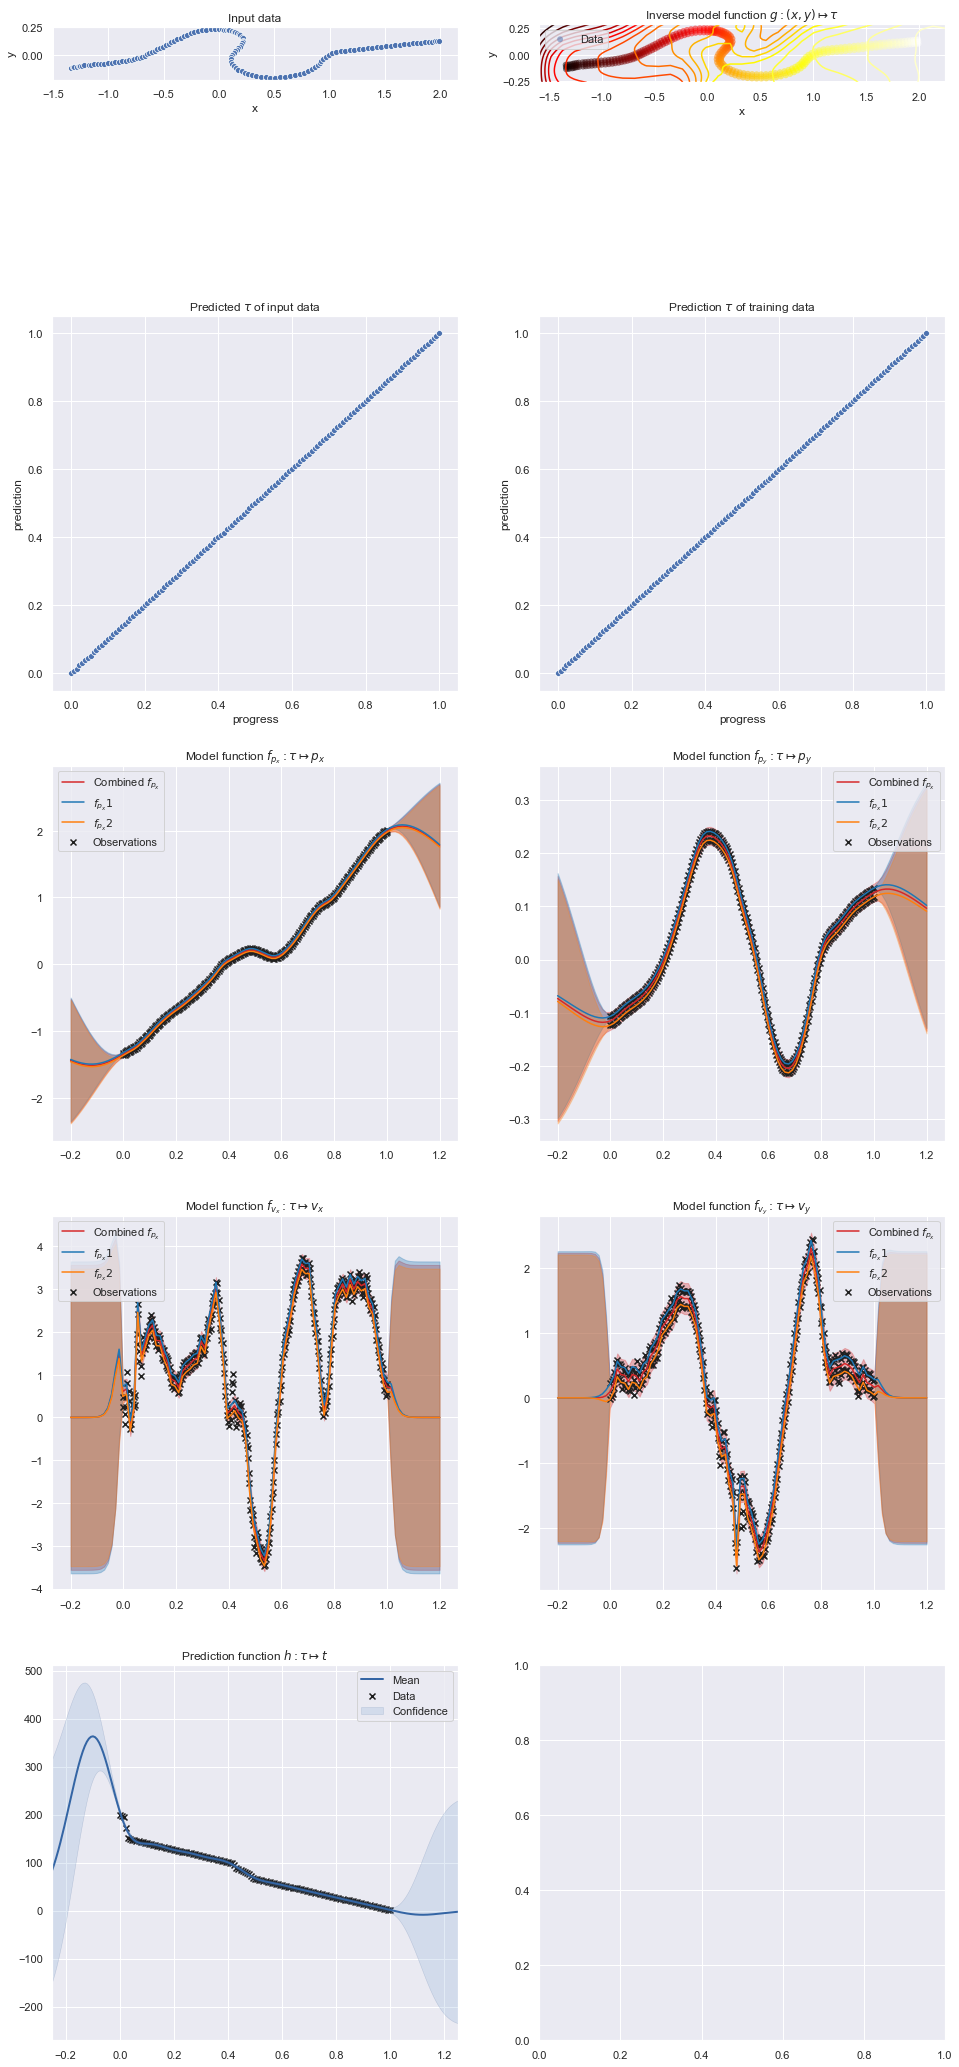

In [37]:
from math import sqrt, cos, sin, radians
import seaborn as sns
import GPy
from GPy.models import GPRegression
from typing import List
from model.trajectory_model import learn_model, plot_model, plot_model_functions

%matplotlib inline
sns.set(style="darkgrid")

np.random.seed(1)

# What to load
route_n = 3
seg_n = 9 # 1-indexed
train_traj_n = 1 # 0-indexed
stop_compress_delta = 5 # meters
train_traj_id = train_traj_ids[train_traj_n]
seg = in_sample_seg_loader(seg_n, train_traj_id)
normaliser = seg_normalisers[seg_n]
f_p_codomain = ['x', 'y']
f_v_codomain = ['dx', 'dy']
f_p_likelihood_noise = .5 / normaliser.p_scale  # meters
f_v_likelihood_noise = .0000000001 / normaliser.v_scale # m/s
delta_xy = 10 / normaliser.p_scale    # metres, spatial cluster width
delta_p = 4 / normaliser.p_scale # metres, p cluster width
delta_v = .5 / normaliser.v_scale   # metres/second, v cluster width

m = learn_model(
    seg, route_n, seg_n, train_traj_n,
    f_p_codomain, f_v_codomain,
    f_p_likelihood_noise,
    f_v_likelihood_noise,
    normaliser,
    delta_xy, 
    delta_p, delta_v
)
plot_model(m, seg)

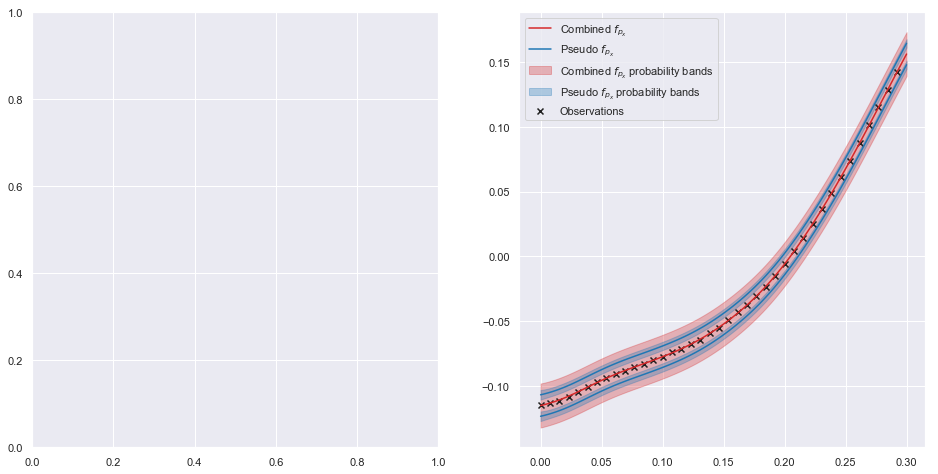